# Exploratory data analysis

### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
from fastai.structured import *
from fastai.column_data import *

In [63]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils.extmath import cartesian

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
from scipy.stats import norm

In [119]:
from TreeEnsembles import *

### Load data

In [9]:
data = pd.read_csv('data/Data Correlation 3.csv')

In [10]:
data.head()

,gender,number_of_followers,number_of_posts,average_likes,likes_to_followers
0,Female,15531.0,881.0,1265.13,8.15
1,NaN,21887.0,384.0,454.57,2.08
2,Male,87256.0,1044.0,3257.2,3.73
3,Female,11828.0,567.0,391.03,3.31
4,Male,9930.0,3.0,129.33,1.3


In [11]:
data.shape

(20000, 5)

### Data Describe

In [14]:
data.drop(9928,axis=0,inplace=True)  # Improper data
data.drop(10448,inplace=True)        # Outlier

In [16]:
data.dropna(inplace=True)  # removed 6588 from 19998 

In [27]:
data = data[data.average_likes != 0.00]  #removed 37 values

In [13]:
data.gender.isna().sum()

6588

`change the datatype to float64`

In [18]:
data.average_likes= data.average_likes.astype('float64')
data.likes_to_followers = data.likes_to_followers.astype('float64')

In [21]:
data.dtypes

gender                  object
number_of_followers    float64
number_of_posts        float64
average_likes          float64
likes_to_followers     float64
dtype: object

In [19]:
data.gender[data.gender=='female']='Female'

data.gender[data.gender=='male']='Male'

data = data[data.gender != 'Other']

C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
data.gender.value_counts()

Female    7637
Male      5772
Name: gender, dtype: int64

In [22]:
train_cats(data) #change the datatype of data.gender to category

In [23]:
data.gender.cat.categories

Index(['Female', 'Male'], dtype='object')

In [26]:
data.gender = data.gender.cat.codes # replace Female and male with 0 and 1 respectively

In [44]:
(data.describe())/100

,gender,number_of_followers,number_of_posts,average_likes,likes_to_followers
count,133.720000,133.720000,133.720000,133.720000,133.720000
mean,0.004301,854.734871,11.131185,26.884395,0.034587
std,0.004951,3107.448642,15.398250,114.969753,0.037578
min,0.000000,1.200000,0.000000,0.002300,0.000000
25%,0.000000,142.870000,2.650000,2.798750,0.012400
50%,0.000000,247.575000,6.380000,6.700650,0.024500
75%,0.010000,569.292500,13.622500,16.272175,0.044900
max,0.010000,115667.030000,327.240000,4010.517700,1.471000


### Data distribution

C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


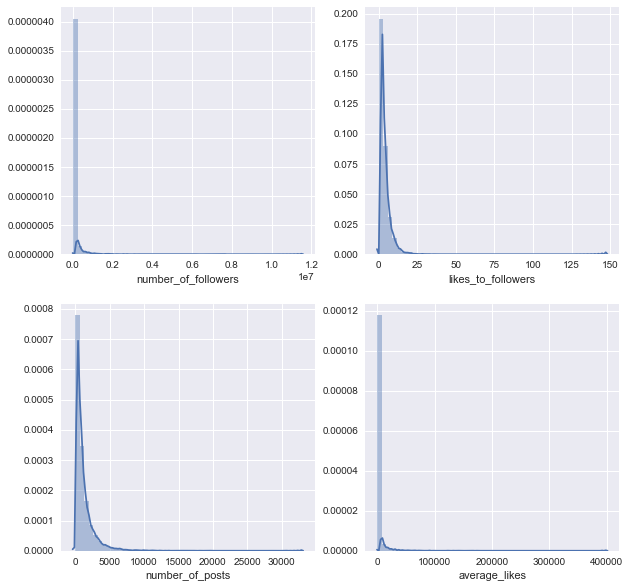

In [39]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
sns.distplot(data['number_of_followers'],ax=axs[0][0])
sns.distplot(data['likes_to_followers'],ax=axs[0][1])
sns.distplot(data['number_of_posts'],ax=axs[1][0])
sns.distplot(data['average_likes'],ax=axs[1][1])

`Since all the data are heavily right skew, we will take log of it`

In [41]:
d = data.copy()
d['number_of_followers_log'] = np.log1p(d['number_of_followers'])
d['number_of_posts_log'] = np.log1p(d['number_of_posts'])
d['average_likes_log'] = np.log1p(d['average_likes'])
d['likes_to_followers_log'] = np.log1p(d['likes_to_followers'])

d.drop(columns = ['number_of_followers','likes_to_followers','average_likes','number_of_posts'],inplace=True)

C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


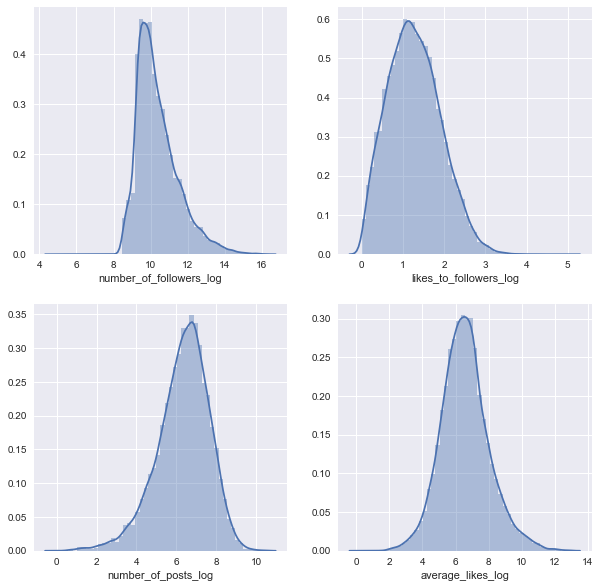

In [43]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
sns.distplot(d['number_of_followers_log'],ax=axs[0][0])
sns.distplot(d['likes_to_followers_log'],ax=axs[0][1])
sns.distplot(d['number_of_posts_log'],ax=axs[1][0])
sns.distplot(d['average_likes_log'],ax=axs[1][1])

### Correlation

`blue` - `Female`<br>
`green` - `Male`

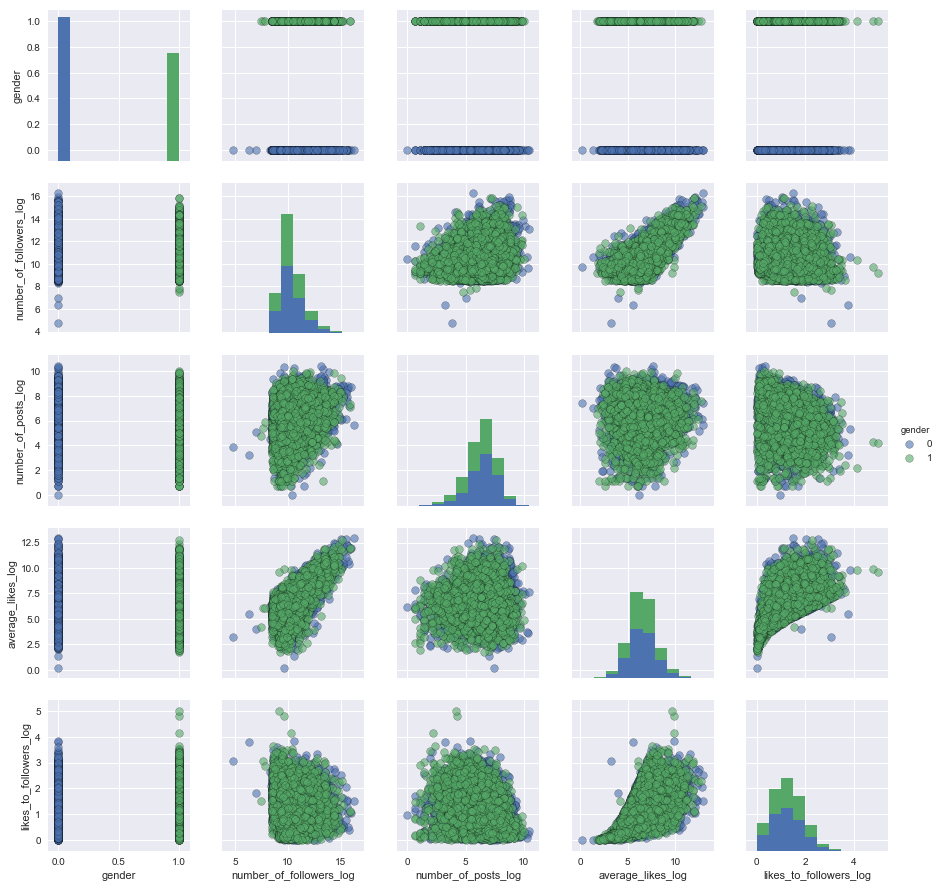

In [55]:
sns.pairplot(d,hue='gender',plot_kws = {'alpha': 0.6, 's': 60, 'edgecolor': 'k'})

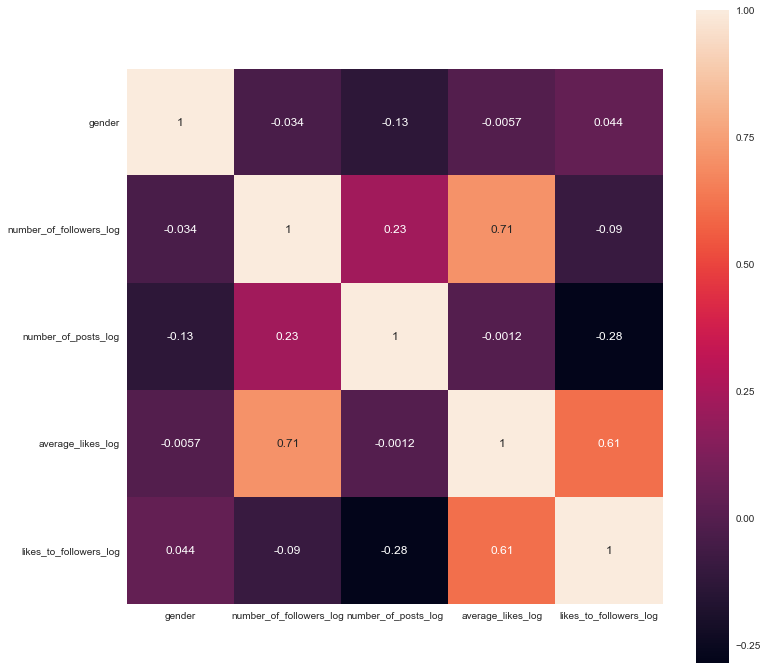

In [60]:
corr = d.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True,annot=True)

As we can see from the heatmap, `likes_to_followers_log` v `average_likes_log` <br>
and `average_likes_log` v `number_of_followers_log` has some correlations

C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


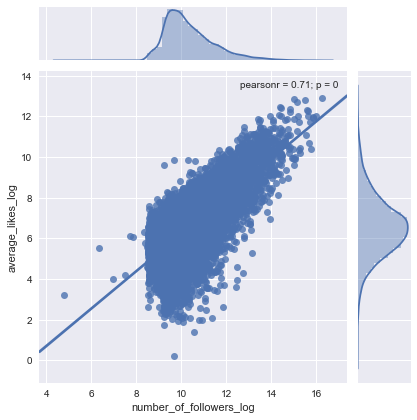

In [58]:
sns.jointplot(x='number_of_followers_log', y='average_likes_log', data = d, kind='reg')

C:\Users\USER\Anaconda2\envs\fastai-cpu\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


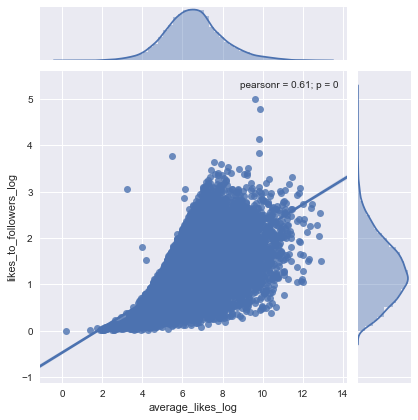

In [53]:
sns.jointplot(x='average_likes_log', y='likes_to_followers_log', data = d, kind='reg')

We have only one categorical feature, that is `Gender`

Let us see the distribution of Gender with respect to `liks_to_followers`

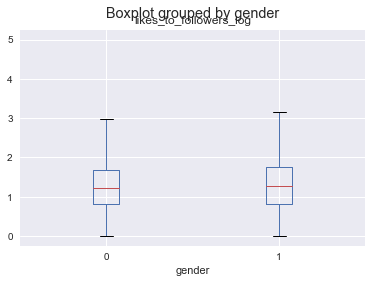

In [54]:
d.boxplot(column=['likes_to_followers_log'], by='gender')

    Gender shows no real correlation

### Random Forest

Since we saw the `gender` and `number_of_posts_log` has no real correlation with `likes_to_followers_log` <br>
we will remove those features and try to build a predictive model

Since their is no real correlation between gender and any other column, I failed miserably trying to find gender of Nan rows using **Random Forest**

`LIKES_TO_FOLLOWERS_LOG`

In [66]:
df_trn, y_trn, nas = proc_df(d.drop(['gender','number_of_posts_log'],axis=1), 'likes_to_followers_log')

X_train, X_valid, y_train, y_valid = train_test_split(df_trn, y_trn, test_size=0.20, random_state=40)

X_train.shape,X_valid.shape

((10697, 2), (2675, 2))

In [68]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(f'train loss: {res[0]}')
    print(f'valid loss: {res[1]}')
    print(f'train accu: {res[2]}')
    print(f'valid accu: {res[3]}')
    if hasattr(m, 'oob_score_'):print(f'oob score: {res[4]}')

In [69]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=100,min_samples_leaf=5,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

train loss: 0.04225565703098138
valid loss: 0.04656722331429637
train accu: 0.9955456670174531
valid accu: 0.9946393991168231
oob score: 0.992589278619194


<b> As we can see we are able to get `99.4%` accuracy in validation set</b>

In [70]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
1,average_likes_log,0.657088
0,number_of_followers_log,0.342912


`No of followers`

In [159]:
df_trn, y_trn, nas = proc_df(d.drop(['gender','number_of_posts_log'],axis=1), 'number_of_followers_log')#d.drop(['gender','number_of_posts_log'],axis=1)

In [160]:
X_train, X_valid, y_train, y_valid = train_test_split(df_trn, y_trn, test_size=0.20, random_state=40)

In [161]:
X_train.shape,X_valid.shape

((10697, 2), (2675, 2))

In [162]:
m = RandomForestRegressor(n_jobs=-1,n_estimators=100,min_samples_leaf=5,oob_score=True)
m.fit(X_train,y_train)
print_score(m)

fi = rf_feat_importance(m, df_trn); fi[:10]

train loss: 0.06043281828952071
valid loss: 0.06561294018753742
train accu: 0.9970927197562995
valid accu: 0.996582634576082
oob score: 0.994995978863483


,cols,imp
0,average_likes_log,0.693739
1,likes_to_followers_log,0.306261


<b> Again we are able to predict `No_of_followers_log` with validation accuracy `99.56%`

#### Visualize Random Forest

In [77]:
n= 13372

In [146]:
x=  d.average_likes_log.values
y = d.number_of_followers_log.values
target = d.likes_to_followers_log.values

In [106]:
# target = norm.pdf((x - 0.75) / 0.1) + norm.pdf((y - 0.75) / 0.1) \
#         + norm.pdf((x - 0.25) / 0.1) + norm.pdf((y - 0.25) / 0.1) \
#         + np.array(np.round(np.random.normal(-0.1,0.1, n), 2))

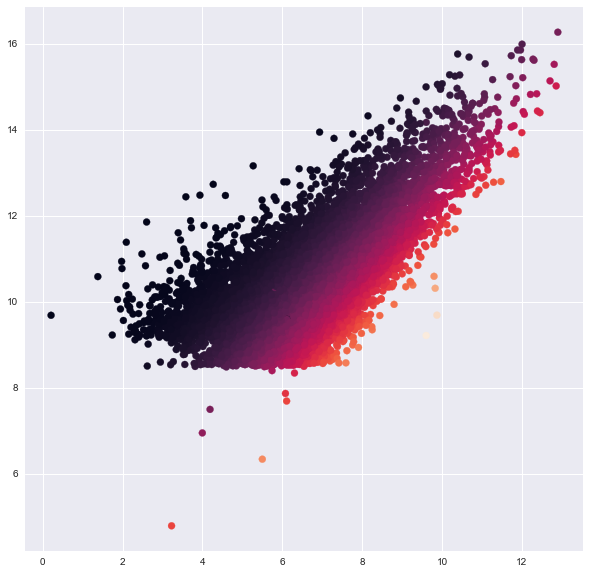

In [147]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x, y, c = target)

Text(0.5,1,'linear fit line')

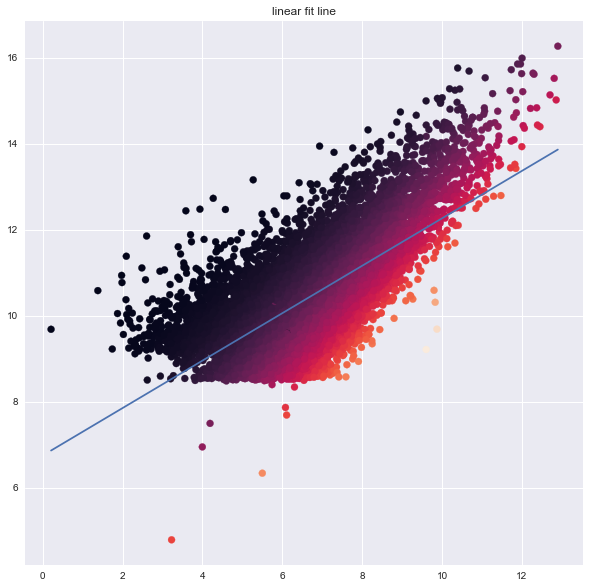

In [157]:
plt.figure(figsize = (10,10))
plt.scatter(x, y, c = target)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.title('linear fit line')

`Best Linear Fit`

In [148]:
data1 = pd.DataFrame({'x' : x, 'y' : y})
rf_model_1 = TreeEnsemble(data1, target, n_trees = 4, sample_sz=n, min_leaf=3)
tree_1 = rf_model_1.trees

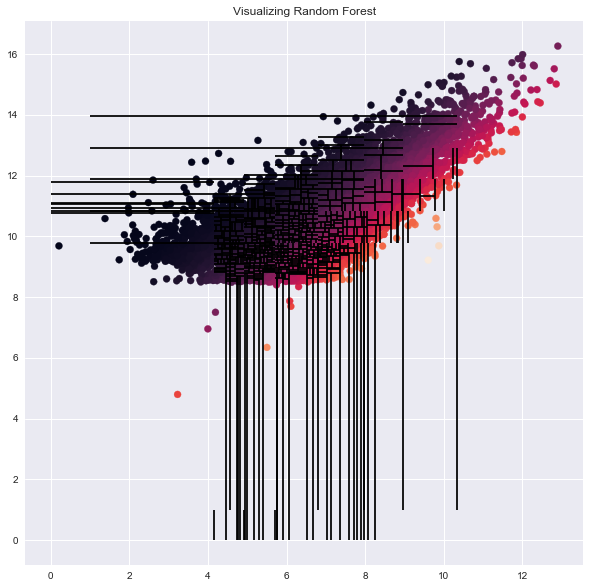

In [158]:
plt.figure(figsize = (10,10))
plt.scatter(x, y, c = target)
plt.title('Visualizing Random Forest')
plot_splits(tree_1[0], (0,0), (1, 1),max_depth=10)

`Random forest`